In [1]:
import time 
import requests
import cv2
import operator
import numpy as np
from __future__ import print_function
from config import api_key

import pprint

# Import library to display results
import matplotlib.pyplot as plt
%matplotlib inline 
# Display images within Jupyter

In [2]:

# Variables
_region = 'westus' #Here you enter the region of your subscription
_url = 'https://{}.api.cognitive.microsoft.com/vision/v2.0/analyze'.format(_region)
_key = api_key
_maxNumRetries = 10

In [3]:
def processRequest( json, data, headers, params ):

    """
    Helper function to process the request to Project Oxford

    Parameters:
    json: Used when processing images from its URL. See API Documentation
    data: Used when processing image read from disk. See API Documentation
    headers: Used to pass the key information and the data type request
    """

    retries = 0
    result = None

    while True:

        response = requests.request( 'post', _url, json = json, data = data, headers = headers, params = params )

        if response.status_code == 429: 

            print( "Message: %s" % ( response.json() ) )

            if retries <= _maxNumRetries: 
                time.sleep(1) 
                retries += 1
                continue
            else: 
                print( 'Error: failed after retrying!' )
                break

        elif response.status_code == 200 or response.status_code == 201:

            if 'content-length' in response.headers and int(response.headers['content-length']) == 0: 
                result = None 
            elif 'content-type' in response.headers and isinstance(response.headers['content-type'], str): 
                if 'application/json' in response.headers['content-type'].lower(): 
                    result = response.json() if response.content else None 
                elif 'image' in response.headers['content-type'].lower(): 
                    result = response.content
        else:
            print( "Error code: %d" % ( response.status_code ) )
            print( "Message: %s" % ( response.json() ) )

        break
        
    return result

In [4]:
def renderResultOnImage( result, img ):
    
    """Display the obtained results onto the input image"""

    R = int(result['color']['accentColor'][:2],16)
    G = int(result['color']['accentColor'][2:4],16)
    B = int(result['color']['accentColor'][4:],16)

    cv2.rectangle( img,(0,0), (img.shape[1], img.shape[0]), color = (R,G,B), thickness = 25 )

    if 'categories' in result:
        categoryName = sorted(result['categories'], key=lambda x: x['score'])[0]['name']
        cv2.putText( img, categoryName, (30,70), cv2.FONT_HERSHEY_SIMPLEX, 2, (255,0,0), 3 )

In [5]:
# URL direction to image
# urlImage = 'https://oxfordportal.blob.core.windows.net/vision/Analysis/3.jpg'
urlImage = "https://dy00k1db5oznd.cloudfront.net/wp-content/uploads/2017/05/GettyImages-452562812-1280x720.jpg"

# urlImage = "https://akns-images.eonline.com/eol_images/Entire_Site/2016113/rs_634x865-160213205734-634.SIcover-ronda-rousey1-jmd-021316.jpg?fit=inside|900:auto&output-quality=90"

# Computer Vision parameters
params = { 'visualFeatures' : 'Color,Categories,Tags,Description,Faces,ImageType,Adult', 'details': 'Celebrities,Landmarks'}

headers = dict()
headers['Ocp-Apim-Subscription-Key'] = _key
headers['Content-Type'] = 'application/json' 

json = { 'url': urlImage } 
data = None

result = processRequest( json, data, headers, params )




# if result is not None:
#     # Load the original image, fetched from the URL
#     arr = np.asarray( bytearray( requests.get( urlImage ).content ), dtype=np.uint8 )
#     img = cv2.cvtColor( cv2.imdecode( arr, -1 ), cv2.COLOR_BGR2RGB )

#     renderResultOnImage( result, img )

#     ig, ax = plt.subplots(figsize=(15, 20))
#     ax.imshow( img )

result

{'categories': [{'name': 'people_',
   'score': 0.421875,
   'detail': {'celebrities': [{'name': 'Ivanka Trump',
      'confidence': 0.9994242191314697,
      'faceRectangle': {'left': 813, 'top': 198, 'width': 153, 'height': 153}},
     {'name': 'Donald Trump',
      'confidence': 0.9996674060821533,
      'faceRectangle': {'left': 1093,
       'top': 176,
       'width': 146,
       'height': 146}}]}},
  {'name': 'people_group',
   'score': 0.52734375,
   'detail': {'celebrities': [{'name': 'Ivanka Trump',
      'confidence': 0.9994242191314697,
      'faceRectangle': {'left': 813, 'top': 198, 'width': 153, 'height': 153}},
     {'name': 'Donald Trump',
      'confidence': 0.9996674060821533,
      'faceRectangle': {'left': 1093,
       'top': 176,
       'width': 146,
       'height': 146}}]}}],
 'adult': {'isAdultContent': False,
  'isRacyContent': False,
  'adultScore': 0.001953425817191601,
  'racyScore': 0.003711030352860689},
 'color': {'dominantColorForeground': 'Black',
  'do

In [6]:
pprint.pprint(result)

{'adult': {'adultScore': 0.001953425817191601,
           'isAdultContent': False,
           'isRacyContent': False,
           'racyScore': 0.003711030352860689},
 'categories': [{'detail': {'celebrities': [{'confidence': 0.9994242191314697,
                                             'faceRectangle': {'height': 153,
                                                               'left': 813,
                                                               'top': 198,
                                                               'width': 153},
                                             'name': 'Ivanka Trump'},
                                            {'confidence': 0.9996674060821533,
                                             'faceRectangle': {'height': 146,
                                                               'left': 1093,
                                                               'top': 176,
                                                               'width'

In [25]:
result["adult"]

{'isAdultContent': False,
 'isRacyContent': False,
 'adultScore': 0.001953425817191601,
 'racyScore': 0.003711030352860689}

C:\Users\warne\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


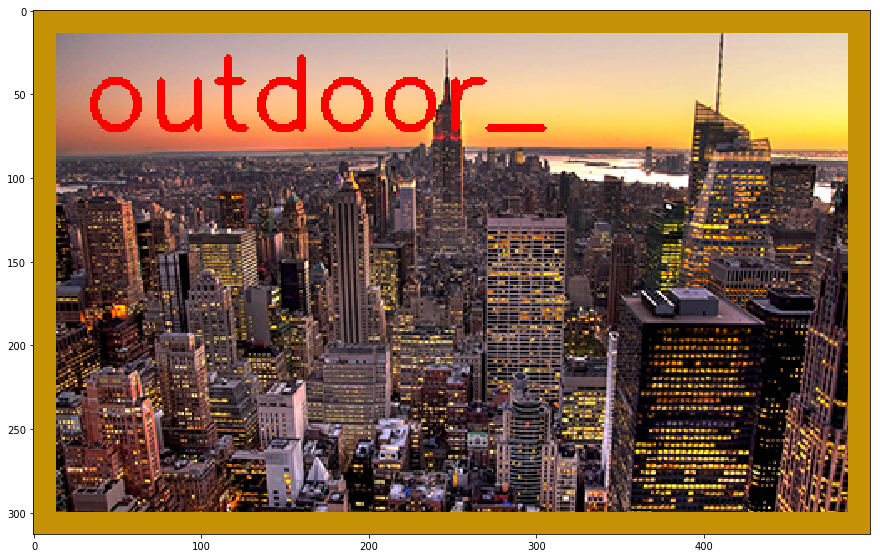

In [33]:

# Load raw image file into memory
pathToFileInDisk = r'D:\tmp\3.jpg'
with open( pathToFileInDisk, 'rb' ) as f:
    data = f.read()
    
# Computer Vision parameters
params = { 'visualFeatures' : 'Color,Categories'} 

headers = dict()
headers['Ocp-Apim-Subscription-Key'] = _key
headers['Content-Type'] = 'application/octet-stream'

json = None

result = processRequest( json, data, headers, params )

if result is not None:
    # Load the original image, fetched from the URL
    data8uint = np.fromstring( data, np.uint8 ) # Convert string to an unsigned int array
    img = cv2.cvtColor( cv2.imdecode( data8uint, cv2.IMREAD_COLOR ), cv2.COLOR_BGR2RGB )

    renderResultOnImage( result, img )

    ig, ax = plt.subplots(figsize=(15, 20))
    ax.imshow( img )